Starter med å importere dhlab

Hvis dhlab ikke fins må den installeres

Når den er installert, er det bare å importere, gjør den klar i notebook

In [1]:
import dhlab.nbtext as nb

Da er alle kommandoene i modulen dhlab.nbtext tilgjengelig

Fyll in parametre

In [2]:
søkeord = 'film'

In [3]:
startår = 1960

In [4]:
sluttår = 1970

In [5]:
nøkkelord = ["journalist", "redaktør", "journalisten", "readaktøren", 'diktatur', 'arbeid']

Analyser

In [6]:
nb.concordance(søkeord, yearfrom = startår, yearto = sluttår, corpus = 'avis', before = 12, after = 12)

jaerbladet-19661209,", ag le også b til skolefilm . N \ lis var",film,! e le i Oppdal i Trøndelag og filmet en . ;
jaerbladet-19661209,des. kl. 19.30 . Val . Politibetjent Gunnar Stenslond kåserer eg viser,film,om emnet : « Borna og trafikken » . — Skulestyraren orienterer
jaerbladet-19661209,usBt tirsdi-g 13 desk « 19 30. larrer Gudr.n la- Ind viser,film,fri II ; ln Anl.kt og ■ > * Qerd-S Thu og
jaerbladet-19661209,wa i Bryne K > no ! har alt m kan I,film,i di ■ ' - Po n d gode nerver gi .
jaerbladet-19660111,", og dette er utgangspunktet for en høydramatisk , spennende og overraskende",film,", der vi bl . a . treffer filmstjernen Ann-Margret i en"
hamararbeiderblad-19700902,I 1. DIVISJON ! Siste dag 1815 og 2045. V T En,film,av l JACQUES ' . 2 m DELON SERIEKAMP FERIE - WEEKEND
hamararbeiderblad-19690217,"grunnmur og piper moderne kjøkkkeninnredninger , planløsninger o.s . v. Lysbilder og",film,. BRUMUNDDAL - TLF . F 41111 Spesialister fra Elkem / Rockwool
hamararbeiderblad-19690217,"vegger og gulv , gulvbelegg , fliser o.s . v. Lysbilder og",film,". TIRSDAG STEINU i Industri ONSDAG Spesialister fra Berger Langmoen , Jotun"
hamararbeiderblad-19690217,"husbyggingen , parkett , bruk av lim o.s . v. Lysbilder og",film,. Il I H ; * - H 147111 il 1 HØYISOLERENDE
hamararbeiderblad-19690217,pa Veldrom onsdag 19. februar kl. 19.30 . Arbeidsinstruktor Leif Hvorup viser,film,og holder foredrag om riktig arbeidsteknikk . Musikk . Vel mott .
dagogtid-19650109,lands humor . Kvifor er det så lite av det i norsk,film,? ( tet ironiske og underfundige . Og det synest du at


Teller opp kontekstord for målordet (her 'avis') med `collocation`

In [7]:
coll = nb.collocation(søkeord, yearfrom = startår, yearto = sluttår, corpus = 'avis', before = 5, after = 5)

Kan lage kollokasjon av ord til høyre

In [8]:
coll_h = nb.collocation(søkeord, yearfrom = startår, yearto = sluttår, corpus = 'avis', before = 0, after = 5)

Og en for ord til venstre

In [9]:
coll_v = nb.collocation(søkeord, yearfrom = startår, yearto = sluttår, corpus = 'avis', before = 5, after = 0)

In [10]:
coll.head(10)

,0
!,548
"""",518
#,20
$,21
%,51
&,122
',741
(,1082
),1116
*,509


Vi kan sammenligne med en referanse, bruker normalen fra bøker.

In [11]:
ref = nb.frame(nb.totals(150000))

In [12]:
ref.head(30)

,0
.,1265723110
",",1105303412
og,543432056
i,460246057
det,273411583
som,265144740
til,254500136
er,248764786
av,235180661
en,231631623


Lager en variabel `assoc`for å lagre de viktigste ordene

In [13]:
assoc = nb.frame_sort(nb.frame(coll[0]/ref[0]))

In [14]:
assoc.head(10)

,0
bevertning,0.012923
lysbilder,0.012729
Amerikansk,0.012052
kåseri,0.011100
Ungarsk,0.010816
19.30,0.010488
20.30,0.009477
Britisk,0.009129
hovedrollene,0.008443
22.30,0.007028


Da ser vi høyre og venstrekontekst

In [15]:
assoc_h = nb.frame_sort(nb.frame(coll_h[0]/ref[0]))

In [16]:
assoc_h.head(10)

,0
bevertning,0.008529
lysbilder,0.007536
utlodning,0.005935
20.30,0.005662
værmelding,0.005586
kåseri,0.005315
22.30,0.005146
billedkunst,0.004825
19.30,0.004706
17.30,0.004642


Her assosiasjoner til høyre

In [17]:
assoc_v = nb.frame_sort(nb.frame(coll_v[0]/ref[0]))

In [18]:
assoc_v.head(20)

,0
Amerikansk,0.011922
Ungarsk,0.010816
Britisk,0.009095
kåseri,0.005784
19.30,0.005782
hovedrollene,0.005307
lysbilder,0.005193
instruktiv,0.004847
Polsk,0.004825
bevertning,0.004394


Visualisere med ordskyer eller nettverk

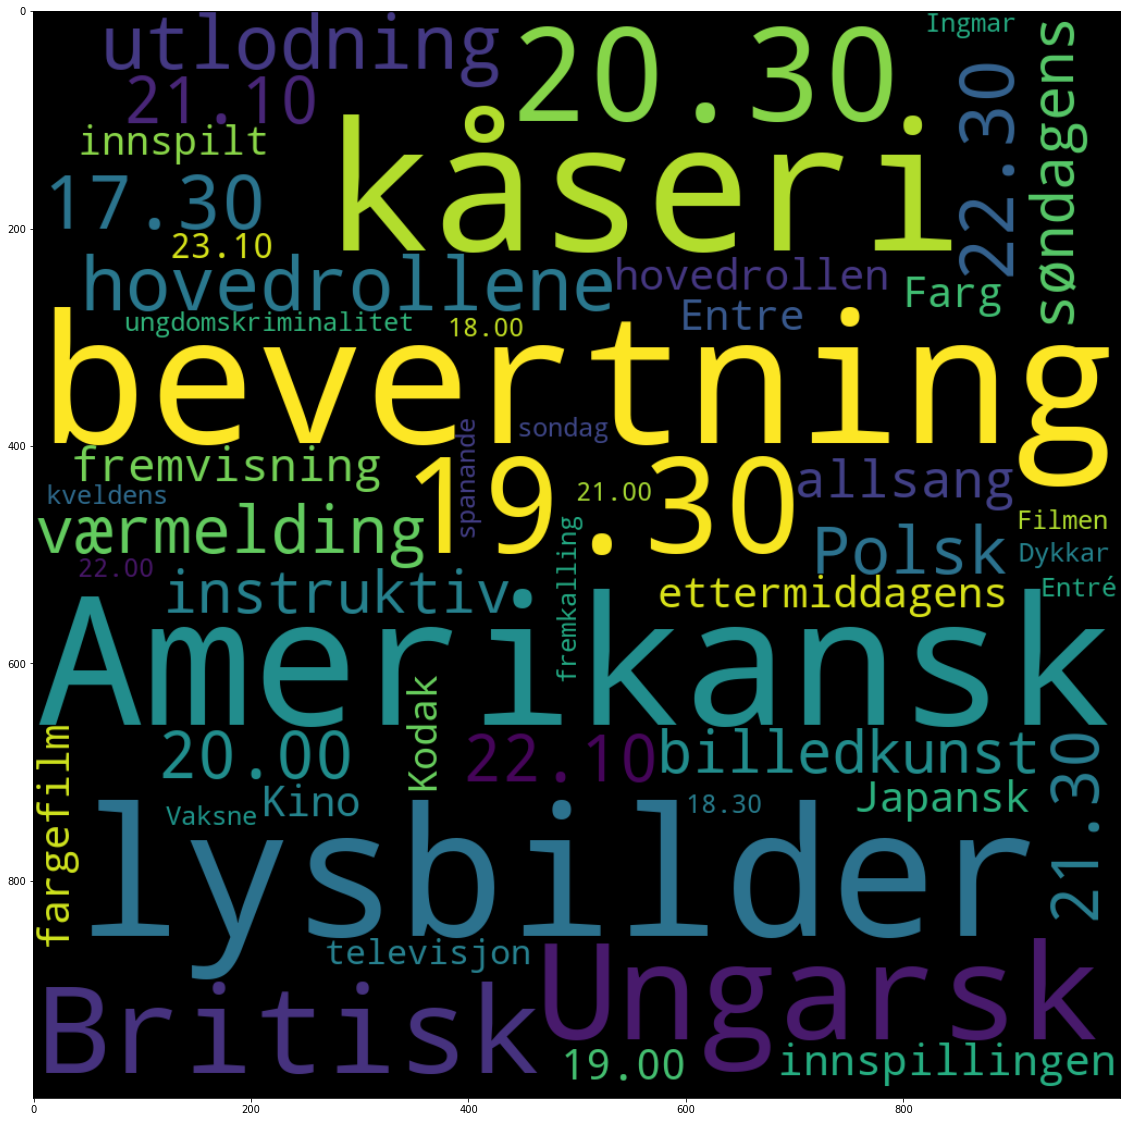

In [19]:
nb.cloud(assoc.head(50))

Lager med nøkkelord, og ser på forholdet mellom dem

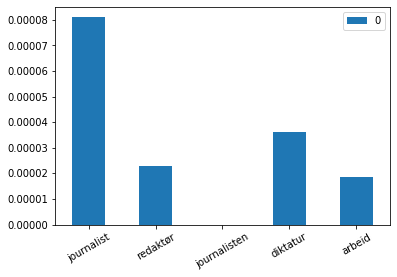

In [20]:
assoc.loc[[x for  x in nøkkelord if x in assoc.index]].plot(kind='bar', rot=30)

Finn totalen, hvor ofte nøkkelordene forekommer

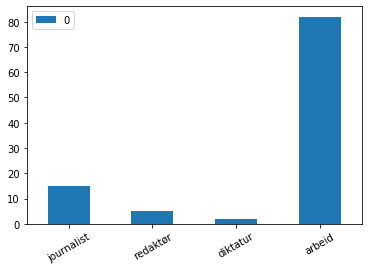

In [21]:
coll.loc[[x for  x in nøkkelord if x in coll.index]].plot(kind='bar', rot=30)